# Getting Audio Effects in Python via Pysox
This is a test of one way to get access to some audio effects from the command-line utility [sox](http://sox.sourceforge.net/), using [Pysox](https://pythonhosted.org/pysox/).  Click [here for a list sox effects](http://sox.sourceforge.net/sox.html#EFFECTS).
What we're going to do is write to a file, call sox, and load the output file. 

Since another project is already using librosa for audio file I/O, we'll use that too. But you could use another audio reader/writer.

First we'll load some audio and play it...

In [1]:
import pysox
import librosa
signal, sr = librosa.load('talking_test.wav')

from IPython.display import Audio
Audio(signal, rate=sr)

General routine to apply an effect, by saving to a file and calling sox, and loading the output file:

In [2]:
def apply_sox_effect(signal, sr, effectparams):
    inpath, outpath = 'in.wav', 'out.wav'
    librosa.output.write_wav(inpath, signal, sr)         # write the input audio to a file
    
    app = pysox.CSoxApp(inpath, outpath, effectparams=effectparams)   # apply the sox effect & get new file
    app.flow()
    
    out_signal, sr = librosa.load(outpath, sr)
    return out_signal, sr

Now select a (sox) affect and its parameters, and call the apply_effect

In [3]:
effectparams=[ ("vol", [ b'18dB' ]), ]
new_signal, sr = apply_sox_effect(signal, sr, effectparams)

And play the resulting sound

In [4]:
Audio(new_signal, rate=sr)

Alternatively, we could generate some audio and then process it in a similar way...

In [5]:
import numpy as np
sample_length = 4 * sr                         # 4 seconds 
noise = (np.random.rand(sample_length)-0.5)      # random values between -0.5 and 0.5

Let's plot it...

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(noise)


And look at a spectrogramm...

(array([[3.65438140e-06, 1.96938353e-06, 2.55263818e-08, ...,
         8.17668939e-06, 7.18888924e-07, 2.46425047e-06],
        [1.19049032e-05, 2.53595201e-07, 3.75340866e-06, ...,
         1.28736396e-05, 7.07325674e-06, 1.15716206e-06],
        [1.39451606e-05, 2.33222851e-06, 2.75094551e-06, ...,
         1.35271989e-06, 2.52814412e-05, 4.64611330e-06],
        ...,
        [1.26539494e-06, 3.89343114e-06, 1.44699241e-05, ...,
         1.89058685e-06, 1.21225205e-05, 1.92608032e-06],
        [9.40668762e-07, 3.91191920e-06, 9.52907655e-06, ...,
         3.08739404e-06, 1.24377087e-05, 1.11719347e-06],
        [2.99992836e-07, 9.79437199e-07, 1.80364898e-05, ...,
         1.38283187e-06, 2.35805003e-06, 1.80086552e-08]]),
 array([    0.        ,    43.06640625,    86.1328125 ,   129.19921875,
          172.265625  ,   215.33203125,   258.3984375 ,   301.46484375,
          344.53125   ,   387.59765625,   430.6640625 ,   473.73046875,
          516.796875  ,   559.86328125,   602.929

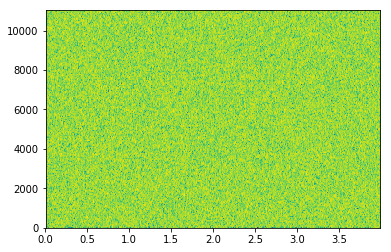

In [7]:
plt.specgram(noise, NFFT=512, Fs=sr, noverlap=256)

And listen to it...

In [8]:
Audio(noise, rate=sr)

And apply our effect...

In [9]:
effectparams=[ ("lowpass", [ b'500' ]), ]
new_noise, sr = apply_sox_effect(noise, sr, effectparams)
Audio(new_noise, rate=sr)

Plot the new one...

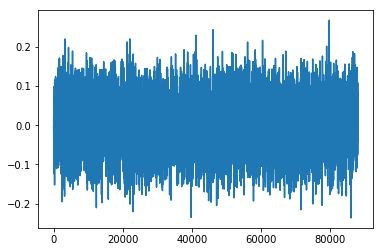

In [10]:
plt.plot(new_noise)

(array([[4.08937345e-06, 1.96690056e-06, 5.59310335e-09, ...,
         9.59245607e-06, 5.64433884e-07, 2.25176511e-06],
        [1.15016211e-05, 3.95288781e-07, 3.84973502e-06, ...,
         1.26408667e-05, 6.97733143e-06, 8.72123229e-07],
        [1.38476294e-05, 2.25294628e-06, 2.34085954e-06, ...,
         8.38802662e-07, 2.64480360e-05, 4.02105840e-06],
        ...,
        [2.82557398e-14, 5.72174998e-15, 2.61965435e-15, ...,
         1.25612879e-14, 2.41496406e-14, 9.99805774e-15],
        [1.18732807e-14, 4.43044621e-16, 2.84631872e-15, ...,
         1.71121745e-15, 2.69999237e-14, 3.71283000e-15],
        [1.64855727e-15, 1.38447633e-18, 3.58691729e-16, ...,
         5.10153037e-18, 1.18617538e-14, 1.29242202e-15]]),
 array([    0.        ,    43.06640625,    86.1328125 ,   129.19921875,
          172.265625  ,   215.33203125,   258.3984375 ,   301.46484375,
          344.53125   ,   387.59765625,   430.6640625 ,   473.73046875,
          516.796875  ,   559.86328125,   602.929

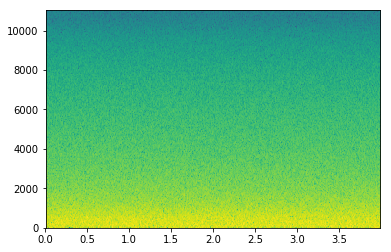

In [11]:
plt.specgram(new_noise, NFFT=512, Fs=sr, noverlap=256)

In [13]:
# One final change: pass in a string, e.g. "lowpass,500", and let the routine do the parsing
# and don't return the sample rate since you're going to use the same on
def apply_sox_effect2(signal, sr, fxstr):
    inpath, outpath = 'in.wav', 'out.wav'
    librosa.output.write_wav(inpath, signal, sr)         # write the input audio to a file
 
    tmp = fxstr.split(',')
    fxname = tmp[0]
    fxvals = [str.encode(x) for x in tmp[1:]]
    effectparams = [(fxname, fxvals),]
    app = pysox.CSoxApp(inpath, outpath, effectparams=effectparams)   # apply the sox effect & get new file
    app.flow()
    
    out_signal, sr = librosa.load(outpath, sr)
    return out_signal

In [14]:
new_noise2 =  apply_sox_effect2(noise, sr, 'lowpass,500')
Audio( new_noise2, rate=sr)